idea:

compare different jobs based on location information


In [ ]:
# Imports and downloads
import nltk

nltk.download('punkt')
# Download wordnet for the lemmatization
nltk.download('wordnet')
# Download stopwords list for the removal of stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('averaged_perceptron_tagger')
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import LatentDirichletAllocation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
#!wget -O archive.zip https://www.dropbox.com/scl/fi/wmionu596zfu45stmm65v/archive.zip?rlkey=q2nmnbd6kwth8didtage9ojh7&dl=0
#!unzip archive.zip

!wget -O CraigslistBostonGigs09262022_cleaned.csv https://www.dropbox.com/scl/fi/8dqpxce1h3zm5q66ozyx0/CraigslistBostonGigs09262022_cleaned.csv?rlkey=m07kt5uf2t7510gbra1agdbcx&dl=0

--2023-12-05 22:51:58--  https://www.dropbox.com/scl/fi/8dqpxce1h3zm5q66ozyx0/CraigslistBostonGigs09262022_cleaned.csv?rlkey=m07kt5uf2t7510gbra1agdbcx
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4bb83a8ba57ea87f1ef7e008c3.dl.dropboxusercontent.com/cd/0/inline/CI0ahGvFHBvjm0-ZkeyEENgPHWXTLSj5CkeVN97-nRSh4Vq9pMRbd5dM6TmBouIook0_eVK5dZ00HUAcb3N9VrosaPVGTQHOkAE09l8FHBlODExqekqbYZkURKcaYRV0CD_NfE328kE2bIPRL9pzWR3V/file# [following]
--2023-12-05 22:52:03--  https://uc4bb83a8ba57ea87f1ef7e008c3.dl.dropboxusercontent.com/cd/0/inline/CI0ahGvFHBvjm0-ZkeyEENgPHWXTLSj5CkeVN97-nRSh4Vq9pMRbd5dM6TmBouIook0_eVK5dZ00HUAcb3N9VrosaPVGTQHOkAE09l8FHBlODExqekqbYZkURKcaYRV0CD_NfE328kE2bIPRL9pzWR3V/file
Resolving uc4bb83a8ba57ea87f1ef7e008c3.dl.dropboxusercontent.com (uc4bb83a8ba57ea87f1ef7e008c3.dl.dropboxuserconten

In [ ]:
import pandas as pd

gig_data = pd.read_csv("CraigslistBostonGigs09262022_cleaned.csv", header = 0)
display(gig_data)

,Unnamed: 0,post_datetime,post_title_link,post_title_text,post_hood,detail_body,Completed,pay_from_post,pay_rate,post_hood_cleaned,county
0,0,2022-09-26T16:16:39.000Z,https://boston.craigslist.org/gbs/lbg/75385228...,* Deliver with DoorDash *,boston/cambridge/brookline,NaN,True,NaN,lump,Cambridge,Middlesex County
1,1,2022-09-26T16:13:53.000Z,https://boston.craigslist.org/gbs/dmg/75385300...,Up to $300 Paid Research for Toyota / Lexus Dr...,Boston,NaN,True,300.0,lump,Boston,Suffolk County
2,2,2022-09-26T16:08:33.000Z,https://boston.craigslist.org/gbs/lbg/75385227...,Grubhub Delivery Driver - No Experience Needed!,Boston,NaN,True,NaN,hourly,Boston,Suffolk County
3,3,2022-09-26T15:57:42.000Z,https://boston.craigslist.org/gbs/tlg/75385206...,"The most fun work at live events! 52,000 real ...",Greater Boston area,NaN,True,30.0,hourly,Greater Boston Area,Suffolk County
4,4,2022-09-26T15:44:01.000Z,https://boston.craigslist.org/gbs/lbg/75385138...,💸📈💸📈LAWN CARE PROS - MAKE UP TO $1000 PER WEEK,boston/cambridge/brookline,NaN,True,1000.0,weekly,Cambridge,Middlesex County
...,...,...,...,...,...,...,...,...,...,...,...
934,934,2022-08-27T14:17:45.000Z,https://boston.craigslist.org/gbs/dmg/75265947...,">>> Elder care, daytime nursing","Brookline, BU Campus area",NaN,True,20.0,hourly,Brookline,Norfolk County
935,935,2022-08-27T13:26:51.000Z,https://boston.craigslist.org/nwb/lbg/75265751...,Experienced movers needed this morning at 11:0...,"Hudson, NH",NaN,True,22.0,hourly,Hudson,Middlesex County
936,936,2022-08-27T11:48:22.000Z,https://boston.craigslist.org/gbs/lbg/75265505...,Labor and a Truck - 2-3 Hours @ 9 A.M - Saturd...,boston/cambridge/brookline,NaN,True,100.0,lump,Cambridge,Middlesex County
937,937,2022-08-27T11:02:05.000Z,https://boston.craigslist.org/gbs/dmg/75265441...,Focus Group for Pregnant Moms & New Parents,"Boston, MA",NaN,True,200.0,lump,Boston,Suffolk County


In [ ]:
"""
Tokenize each gig in the collection.
"""
# Create a new column tokenized_gig to store the tokenized results
gig_data["tokenized_gig"] = gig_data["post_title_text"].apply(lambda x: nltk.word_tokenize(x))
"""print("=====================================")
print("Tokenized gigs:")
print(gig_data.head())
"""
"""
Use the tokenized gigs after, lemmatize all the words, convert to lowercase.
"""
# Create a function to lemmatize all the words and convert to lowercase
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_and_lower(gig):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in gig if token.isalpha()]
    return [token.lower() for token in lemmatized_tokens]

# Use the lemmatize_and_lower function to add the lemmatized and lowercase text to the gig_data data frame
gig_data['lemmatized_lower_gig'] = gig_data['tokenized_gig'].apply(lemmatize_and_lower)
"""print("=====================================")
print("Lemmatized and lowercase gigs:")
print(gig_data.head())"""

"""
Remove all the stop-words and the punctuations.
"""
# Define a function to remove stopwords and punctuation
stop_words = set(stopwords.words('english'))

# Correct the formation of the more_stopwords set
more_stopwords = set(['asap', 'schedule', 'call','available','choose', 'fast','participating','daily', 'week', 'burlington','boston', 'part', 'time', 'gig', 'work', 'working', 'paid', 'get', 'help', 'need', 'needed', 'want', 'wanted', 'earn', 'money', 'bonus', 'make', 'looking', 'seeking', 'immediate', 'makes', 'earn', 'earning', 'making', 'job', 'jobs', 'shift', 'shifts', 'hour', 'per', 'hours', 'pay'])

# Combine nltk's English stop words with your additional stop words
stop_words = set(stopwords.words('english')).union(more_stopwords)

def remove_stopwords_and_punctuation(tokens):
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation and token not in more_stopwords]
    return filtered_tokens

# Apply the function to the lemmatized_lower_gig column and save in the cleaned_gig column
gig_data['cleaned_gig'] = gig_data['lemmatized_lower_gig'].apply(remove_stopwords_and_punctuation)
"""
# gig_data contains the column "cleaned_gig" with the clean text
print("=====================================")
print("Cleaned gigs:")
print(gig_data.head())
"""
"""
Transform gigs into a term-document matrix.
The minimal document frequency for each term is 1. Also, include 2-gram.
"""
# Remove commas and spaces between words in the 'cleaned_gig' column
gig_data['cleaned_gig'] = gig_data['cleaned_gig'].apply(lambda x: ' '.join(x).replace(',', ''))

# Convert the 'cleaned_gig' column to a list
cleaned_gigs_list = gig_data['cleaned_gig'].tolist()

# Create CountVectorizer, including 2-gram and minimum document frequency of 1
vectorizer1 = CountVectorizer(ngram_range=(1, 2), min_df=1)

term_document_matrix = vectorizer1.fit_transform(cleaned_gigs_list)
terms = vectorizer1.get_feature_names_out()

vectors_array = term_document_matrix.toarray()

# Get the dimensions of the vectors
num_documents, num_features = vectors_array.shape

#"""
#Print the dimensions
#print("=====================================")
#print("Number of Documents (Rows):", num_documents)
#print("Number of Features (Columns):", num_features)

In [ ]:
display(gig_data)

,Unnamed: 0,post_datetime,post_title_link,post_title_text,post_hood,detail_body,Completed,pay_from_post,pay_rate,post_hood_cleaned,county,tokenized_gig,lemmatized_lower_gig,cleaned_gig
0,0,2022-09-26T16:16:39.000Z,https://boston.craigslist.org/gbs/lbg/75385228...,* Deliver with DoorDash *,boston/cambridge/brookline,NaN,True,NaN,lump,Cambridge,Middlesex County,"[*, Deliver, with, DoorDash, *]","[deliver, with, doordash]",deliver doordash
1,1,2022-09-26T16:13:53.000Z,https://boston.craigslist.org/gbs/dmg/75385300...,Up to $300 Paid Research for Toyota / Lexus Dr...,Boston,NaN,True,300.0,lump,Boston,Suffolk County,"[Up, to, $, 300, Paid, Research, for, Toyota, ...","[up, to, paid, research, for, toyota, lexus, d...",research toyota lexus drivers
2,2,2022-09-26T16:08:33.000Z,https://boston.craigslist.org/gbs/lbg/75385227...,Grubhub Delivery Driver - No Experience Needed!,Boston,NaN,True,NaN,hourly,Boston,Suffolk County,"[Grubhub, Delivery, Driver, -, No, Experience,...","[grubhub, delivery, driver, no, experience, ne...",grubhub delivery driver experience
3,3,2022-09-26T15:57:42.000Z,https://boston.craigslist.org/gbs/tlg/75385206...,"The most fun work at live events! 52,000 real ...",Greater Boston area,NaN,True,30.0,hourly,Greater Boston Area,Suffolk County,"[The, most, fun, work, at, live, events, !, 52...","[the, most, fun, work, at, live, event, real, ...",fun live event real hr
4,4,2022-09-26T15:44:01.000Z,https://boston.craigslist.org/gbs/lbg/75385138...,💸📈💸📈LAWN CARE PROS - MAKE UP TO $1000 PER WEEK,boston/cambridge/brookline,NaN,True,1000.0,weekly,Cambridge,Middlesex County,"[💸📈💸📈LAWN, CARE, PROS, -, MAKE, UP, TO, $, 100...","[care, pros, make, up, to, per, week]",care pros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,934,2022-08-27T14:17:45.000Z,https://boston.craigslist.org/gbs/dmg/75265947...,">>> Elder care, daytime nursing","Brookline, BU Campus area",NaN,True,20.0,hourly,Brookline,Norfolk County,"[>, >, >, Elder, care, ,, daytime, nursing]","[elder, care, daytime, nursing]",elder care daytime nursing
935,935,2022-08-27T13:26:51.000Z,https://boston.craigslist.org/nwb/lbg/75265751...,Experienced movers needed this morning at 11:0...,"Hudson, NH",NaN,True,22.0,hourly,Hudson,Middlesex County,"[Experienced, movers, needed, this, morning, a...","[experienced, mover, needed, this, morning, at]",experienced mover morning
936,936,2022-08-27T11:48:22.000Z,https://boston.craigslist.org/gbs/lbg/75265505...,Labor and a Truck - 2-3 Hours @ 9 A.M - Saturd...,boston/cambridge/brookline,NaN,True,100.0,lump,Cambridge,Middlesex County,"[Labor, and, a, Truck, -, 2-3, Hours, @, 9, A....","[labor, and, a, truck, hours, saturday, boston...",labor truck saturday
937,937,2022-08-27T11:02:05.000Z,https://boston.craigslist.org/gbs/dmg/75265441...,Focus Group for Pregnant Moms & New Parents,"Boston, MA",NaN,True,200.0,lump,Boston,Suffolk County,"[Focus, Group, for, Pregnant, Moms, &, New, Pa...","[focus, group, for, pregnant, moms, new, parents]",focus group pregnant moms new parents


In [ ]:
# Create and fit the LDA model
lda = LatentDirichletAllocation(n_components=6).fit(term_document_matrix)

# Transform the term-document matrix to get the topic distribution for each document
document_topics = lda.transform(term_document_matrix)

# Extracting the topic distributions for the adjusted range of documents
selected_documents = document_topics[0:10].tolist() + document_topics[500:510].tolist()

# Formatting and printing the topic distributions for the adjusted selection of documents
formatted_output = ""

for i, doc_distribution in enumerate(selected_documents):
    # Determine the document number (0-9 or 500-509)
    doc_number = i if i < 10 else 500 + (i - 10)

    # Formatting the distribution for each document
    distribution_str = ", ".join([f"Topic {topic_idx}: {proportion:.5f}" for topic_idx, proportion in enumerate(doc_distribution)])
    formatted_output += f"Document {doc_number}:\n{distribution_str}\n\n"

print(formatted_output)

# Extracting and printing the top-2 topic numbers for the selected documents
top_2_topics_numbers_output = ""

for j, doc_distribution in enumerate(selected_documents):
    # Determine the document number (0-9 and 500-509)
    doc_number = j if j < 10 else 490 + j  # Adjust to ensure it counts 500-509

    # Sorting the topics by proportion and taking the top 2
    top_2_topics_numbers = np.argsort(doc_distribution)[-2:]

    # Formatting the top 2 topic numbers for each document
    top_topics_numbers_str = ", ".join([f"Topic {topic_idx}" for topic_idx in top_2_topics_numbers])
    top_2_topics_numbers_output += f"Document {doc_number} Top-2 Topics:\n{top_topics_numbers_str}\n\n"

print(top_2_topics_numbers_output)


Document 0:
Topic 0: 0.04167, Topic 1: 0.04173, Topic 2: 0.04168, Topic 3: 0.04168, Topic 4: 0.04168, Topic 5: 0.79157

Document 1:
Topic 0: 0.02083, Topic 1: 0.89568, Topic 2: 0.02087, Topic 3: 0.02093, Topic 4: 0.02084, Topic 5: 0.02084

Document 2:
Topic 0: 0.02086, Topic 1: 0.02085, Topic 2: 0.02099, Topic 3: 0.89548, Topic 4: 0.02087, Topic 5: 0.02095

Document 3:
Topic 0: 0.01668, Topic 1: 0.01667, Topic 2: 0.01667, Topic 3: 0.91661, Topic 4: 0.01667, Topic 5: 0.01671

Document 4:
Topic 0: 0.04167, Topic 1: 0.04181, Topic 2: 0.04172, Topic 3: 0.04167, Topic 4: 0.79147, Topic 5: 0.04167

Document 5:
Topic 0: 0.01673, Topic 1: 0.01669, Topic 2: 0.91657, Topic 3: 0.01667, Topic 4: 0.01667, Topic 5: 0.01667

Document 6:
Topic 0: 0.02086, Topic 1: 0.02085, Topic 2: 0.02089, Topic 3: 0.89555, Topic 4: 0.02083, Topic 5: 0.02102

Document 7:
Topic 0: 0.02781, Topic 1: 0.02778, Topic 2: 0.02778, Topic 3: 0.02778, Topic 4: 0.86107, Topic 5: 0.02778

Document 8:
Topic 0: 0.02083, Topic 1: 0

In [ ]:
# Iterating through each topic for the top 5 terms
for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % topic_idx)
    print(" ".join([terms[i] for i in topic.argsort()[:-5 - 1:-1]]))

Topic 0:
female models technician model repair technician
Topic 1:
study bartenders cleaning kid teach kid
Topic 2:
cleaner moving gutter helper gutter cleaner
Topic 3:
study driver research live event
Topic 4:
focus group focus group removal junk
Topic 5:
event deliver sign flexible staff


In [ ]:
# Count the frequencies of each unique value in "county"
value_counts = gig_data['county'].value_counts()

# Identify the top 5 most frequent values
top_5_values_county = value_counts.head(5).index

# Filter the rows corresponding to these top 5 values
top_5_rows_county = gig_data[gig_data['county'].isin(top_5_values_county)]

# Display the count for each of the top 5 values
top_5_counts_county = value_counts.head(5)

# Display the rows for the top 5 most posted in 'cleaned_post_hood' values
print(top_5_rows_county[['post_hood', 'post_hood_cleaned', 'post_title_text', 'county']])
print('\n')
print(top_5_counts_county)

                      post_hood    post_hood_cleaned  \
0    boston/cambridge/brookline            Cambridge   
1                        Boston               Boston   
2                        Boston               Boston   
3           Greater Boston area  Greater Boston Area   
4    boston/cambridge/brookline            Cambridge   
..                          ...                  ...   
934   Brookline, BU Campus area            Brookline   
935                  Hudson, NH               Hudson   
936  boston/cambridge/brookline            Cambridge   
937                  Boston, MA               Boston   
938                  Framingham           Framingham   

                                       post_title_text            county  
0                            * Deliver with DoorDash *  Middlesex County  
1    Up to $300 Paid Research for Toyota / Lexus Dr...    Suffolk County  
2      Grubhub Delivery Driver - No Experience Needed!    Suffolk County  
3    The most fun work at l

In [ ]:
# Count the frequencies of each unique value in 'cleaned_post_hood'
value_counts = gig_data['post_hood_cleaned'].value_counts()

# Identify the top 10 most frequent values
top_10_values = value_counts.head(10).index

# Filter the rows corresponding to these top 10 values
top_10_rows = gig_data[gig_data['post_hood_cleaned'].isin(top_10_values)]

# Display the count for each of the top 10 values
top_10_counts = value_counts.head(10)

# Display the rows for the top 10 most posted in 'post_hood_cleaned' values
print(top_10_rows[['post_hood_cleaned', 'post_title_text', 'county']])
print('\n')
print(top_10_counts)

    post_hood_cleaned                                    post_title_text  \
0           Cambridge                          * Deliver with DoorDash *   
1              Boston  Up to $300 Paid Research for Toyota / Lexus Dr...   
2              Boston    Grubhub Delivery Driver - No Experience Needed!   
4           Cambridge     💸📈💸📈LAWN CARE PROS - MAKE UP TO $1000 PER WEEK   
5       Boston (West)           CARGO VAN OR BOX TRUCK WITH MOVER NEEDED   
..                ...                                                ...   
931    Boston (South)  Hingham - Labor Needed 2 Hours - Saturday 8/27...   
932            Boston        Paid Study For Volunteers 65 Y.O. And Older   
933            Boston              Street Team Promo for Hip Hop Concert   
936         Cambridge  Labor and a Truck - 2-3 Hours @ 9 A.M - Saturd...   
937            Boston        Focus Group for Pregnant Moms & New Parents   

               county  
0    Middlesex County  
1      Suffolk County  
2      Suffolk 

In [ ]:
# Convert the 'cleaned_review' column to a list
top_10_cleaned_gigs_list = top_10_rows['cleaned_gig'].tolist()

# Create CountVectorizer, including 2-gram and minimum document frequency of 1
vectorizer1 = CountVectorizer(ngram_range=(1, 2), min_df=1)

term_document_matrix = vectorizer1.fit_transform(top_10_cleaned_gigs_list)
terms = vectorizer1.get_feature_names_out()

vectors_array = term_document_matrix.toarray()

# Get the dimensions of the vectors
num_documents, num_features = vectors_array.shape

# Print the dimensions
print("=====================================")
print("Number of Documents (Rows):", num_documents)
print("Number of Features (Columns):", num_features)

Number of Documents (Rows): 610
Number of Features (Columns): 1886


In [ ]:
# Create and fit the LDA model with # topics
number_topics = 10
number_terms = 3
lda = LatentDirichletAllocation(n_components=number_topics).fit(term_document_matrix)

# Transform the term-document matrix to get the topic distribution for each document
document_topics = lda.transform(term_document_matrix)

# Extracting the topic distributions for the adjusted range of documents
selected_documents = document_topics[0:10].tolist() + document_topics[500:510].tolist()

# Formatting and printing the topic distributions for the adjusted selection of documents
formatted_output = ""

for i, doc_distribution in enumerate(selected_documents):
    # Determine the document number (0-9 or 500-509)
    doc_number = i if i < 10 else 500 + (i - 10)

    # Formatting the distribution for each document
    distribution_str = ", ".join([f"Topic {topic_idx}: {proportion:.5f}" for topic_idx, proportion in enumerate(doc_distribution)])
    formatted_output += f"Document {doc_number}:\n{distribution_str}\n\n"

print(formatted_output)

# Extracting and printing the top-2 topic numbers for the selected documents
top_2_topics_numbers_output = ""

for j, doc_distribution in enumerate(selected_documents):
    # Determine the document number (0-9 and 500-509)
    doc_number = j if j < 10 else 490 + j  # Adjust to ensure it counts 500-509

    # Sorting the topics by proportion and taking the top 2
    top_2_topics_numbers = np.argsort(doc_distribution)[-2:]

    # Formatting the top 2 topic numbers for each document
    top_topics_numbers_str = ", ".join([f"Topic {topic_idx}" for topic_idx in top_2_topics_numbers])
    top_2_topics_numbers_output += f"Document {doc_number} Top-2 Topics:\n{top_topics_numbers_str}\n\n"

print(top_2_topics_numbers_output)

# Iterating through each topic for the top # terms
for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % topic_idx)
    print(" ".join([terms[i] for i in topic.argsort()[:-(number_terms) - 1:-1]]))

Document 0:
Topic 0: 0.02500, Topic 1: 0.02500, Topic 2: 0.02500, Topic 3: 0.02500, Topic 4: 0.02500, Topic 5: 0.02501, Topic 6: 0.77498, Topic 7: 0.02500, Topic 8: 0.02500, Topic 9: 0.02500

Document 1:
Topic 0: 0.01250, Topic 1: 0.88749, Topic 2: 0.01250, Topic 3: 0.01250, Topic 4: 0.01250, Topic 5: 0.01250, Topic 6: 0.01250, Topic 7: 0.01250, Topic 8: 0.01250, Topic 9: 0.01250

Document 2:
Topic 0: 0.01250, Topic 1: 0.01250, Topic 2: 0.01250, Topic 3: 0.01250, Topic 4: 0.01250, Topic 5: 0.01250, Topic 6: 0.01250, Topic 7: 0.01250, Topic 8: 0.01250, Topic 9: 0.88750

Document 3:
Topic 0: 0.02500, Topic 1: 0.77499, Topic 2: 0.02500, Topic 3: 0.02500, Topic 4: 0.02500, Topic 5: 0.02500, Topic 6: 0.02500, Topic 7: 0.02500, Topic 8: 0.02500, Topic 9: 0.02500

Document 4:
Topic 0: 0.01000, Topic 1: 0.01000, Topic 2: 0.91000, Topic 3: 0.01000, Topic 4: 0.01000, Topic 5: 0.01000, Topic 6: 0.01000, Topic 7: 0.01000, Topic 8: 0.01000, Topic 9: 0.01000

Document 5:
Topic 0: 0.01250, Topic 1: 0

In [ ]:
import numpy as np
import pandas as pd

# Add Topic Distributions to the DataFrame
for i in range(number_topics):  # 7 topics from lda
    top_10_rows[f'Topic_{i}_Distribution'] = document_topics[:, i]

# Modify the DataFrame to add top 2 topics
top_10_rows['Top_2_Topics'] = [list(np.argsort(distribution)[-2:][::-1]) for distribution in document_topics]

# Optionally, add Top Terms for Each Top 2 Topics
def get_top_terms_for_topics(topics, n_terms=number_terms):
    terms_list = []
    for topic_idx in topics:
        top_terms = " ".join([terms[i] for i in lda.components_[topic_idx].argsort()[:-n_terms - 1:-1]])
        terms_list.append(top_terms)
    return terms_list

top_10_rows['Top_Terms_for_Top_2_Topics'] = top_10_rows['Top_2_Topics'].apply(lambda x: get_top_terms_for_topics(x))

# Display the DataFrame
print(top_10_rows.head())

<ipython-input-12-22d125b92f02>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_rows[f'Topic_{i}_Distribution'] = document_topics[:, i]
<ipython-input-12-22d125b92f02>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_rows[f'Topic_{i}_Distribution'] = document_topics[:, i]
<ipython-input-12-22d125b92f02>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

   Unnamed: 0             post_datetime  \
0           0  2022-09-26T16:16:39.000Z   
1           1  2022-09-26T16:13:53.000Z   
2           2  2022-09-26T16:08:33.000Z   
4           4  2022-09-26T15:44:01.000Z   
5           5  2022-09-26T15:35:40.000Z   

                                     post_title_link  \
0  https://boston.craigslist.org/gbs/lbg/75385228...   
1  https://boston.craigslist.org/gbs/dmg/75385300...   
2  https://boston.craigslist.org/gbs/lbg/75385227...   
4  https://boston.craigslist.org/gbs/lbg/75385138...   
5  https://boston.craigslist.org/bmw/lbg/75385095...   

                                     post_title_text  \
0                          * Deliver with DoorDash *   
1  Up to $300 Paid Research for Toyota / Lexus Dr...   
2    Grubhub Delivery Driver - No Experience Needed!   
4     💸📈💸📈LAWN CARE PROS - MAKE UP TO $1000 PER WEEK   
5           CARGO VAN OR BOX TRUCK WITH MOVER NEEDED   

                    post_hood  detail_body  Completed  pay_from_pos

<ipython-input-12-22d125b92f02>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_rows['Top_Terms_for_Top_2_Topics'] = top_10_rows['Top_2_Topics'].apply(lambda x: get_top_terms_for_topics(x))


In [ ]:
top_10_rows["post_title_text"]

0                              * Deliver with DoorDash *
1      Up to $300 Paid Research for Toyota / Lexus Dr...
2        Grubhub Delivery Driver - No Experience Needed!
4         💸📈💸📈LAWN CARE PROS - MAKE UP TO $1000 PER WEEK
5               CARGO VAN OR BOX TRUCK WITH MOVER NEEDED
                             ...                        
931    Hingham - Labor Needed 2 Hours - Saturday 8/27...
932          Paid Study For Volunteers 65 Y.O. And Older
933                Street Team Promo for Hip Hop Concert
936    Labor and a Truck - 2-3 Hours @ 9 A.M - Saturd...
937          Focus Group for Pregnant Moms & New Parents
Name: post_title_text, Length: 610, dtype: object

In [ ]:
top_10_rows.iloc[:, 9:26]

,post_hood_cleaned,county,tokenized_gig,lemmatized_lower_gig,cleaned_gig,Topic_0_Distribution,Topic_1_Distribution,Topic_2_Distribution,Topic_3_Distribution,Topic_4_Distribution,Topic_5_Distribution,Topic_6_Distribution,Topic_7_Distribution,Topic_8_Distribution,Topic_9_Distribution,Top_2_Topics,Top_Terms_for_Top_2_Topics
0,Cambridge,Middlesex County,"[*, Deliver, with, DoorDash, *]","[deliver, with, doordash]",deliver doordash,0.025000,0.025000,0.025000,0.025002,0.025001,0.025014,0.774978,0.025001,0.025003,0.025000,"[6, 5]","[study moving model, care lawn lawn care]"
1,Boston,Suffolk County,"[Up, to, $, 300, Paid, Research, for, Toyota, ...","[up, to, paid, research, for, toyota, lexus, d...",research toyota lexus drivers,0.012501,0.887490,0.012503,0.012500,0.012503,0.012500,0.012502,0.012500,0.012501,0.012500,"[1, 2]","[join kid teach kid, study research study rese..."
2,Boston,Suffolk County,"[Grubhub, Delivery, Driver, -, No, Experience,...","[grubhub, delivery, driver, no, experience, ne...",grubhub delivery driver experience,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012501,0.887498,"[9, 8]","[delivery driver group, depression people study]"
4,Cambridge,Middlesex County,"[💸📈💸📈LAWN, CARE, PROS, -, MAKE, UP, TO, $, 100...","[care, pros, make, up, to, per, week]",care pros,0.025000,0.774995,0.025000,0.025000,0.025000,0.025004,0.025000,0.025001,0.025000,0.025000,"[1, 5]","[join kid teach kid, care lawn lawn care]"
5,Boston (West),Middlesex County,"[CARGO, VAN, OR, BOX, TRUCK, WITH, MOVER, NEEDED]","[cargo, van, or, box, truck, with, mover, needed]",cargo van box truck mover,0.010001,0.010000,0.909999,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,"[2, 0]","[study research study research, group focus fo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,Boston (South),Norfolk County,"[Hingham, -, Labor, Needed, 2, Hours, -, Satur...","[hingham, labor, needed, hours, saturday, pm]",hingham labor saturday pm,0.012500,0.012500,0.012501,0.012503,0.012500,0.012505,0.012501,0.012500,0.887489,0.012501,"[8, 5]","[depression people study, care lawn lawn care]"
932,Boston,Suffolk County,"[Paid, Study, For, Volunteers, 65, Y.O, ., And...","[paid, study, for, volunteers, and, older]",study volunteers older,0.016667,0.016667,0.849998,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,"[2, 4]","[study research study research, event junk rem..."
933,Boston,Suffolk County,"[Street, Team, Promo, for, Hip, Hop, Concert]","[street, team, promo, for, hip, hop, concert]",street team promo hip hop concert,0.925000,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,"[0, 4]","[group focus focus group, event junk removal]"
936,Cambridge,Middlesex County,"[Labor, and, a, Truck, -, 2-3, Hours, @, 9, A....","[labor, and, a, truck, hours, saturday, boston...",labor truck saturday,0.016668,0.016667,0.016669,0.016668,0.016667,0.849993,0.016668,0.016667,0.016667,0.016667,"[5, 2]","[care lawn lawn care, study research study res..."


### Approach 2: Overall LDA and Analyzing Distribution per Neighborhood

In [ ]:
# Initialize an empty DataFrame to store the results
columns = ['Neighborhood', 'Top 1 Topic Index', 'Top 1 Topic Terms', 'Top 2 Topic Index', 'Top 2 Topic Terms']
neighborhood_topics_df = pd.DataFrame(columns=columns)

for neighborhood in top_10_values:
    # Create a boolean mask for the neighborhood
    neighborhood_mask = top_10_rows['post_hood_cleaned'] == neighborhood

    # Extract topic distribution for the neighborhood using the mask
    neighborhood_distributions = document_topics[neighborhood_mask]
    average_distribution = np.mean(neighborhood_distributions, axis=0)

    # Find the indices of the top 2 topics
    top_2_topics_indices = np.argsort(average_distribution)[-2:]

    # Extract top terms for the top 2 topics
    top_1_terms = " ".join([terms[i] for i in lda.components_[top_2_topics_indices[-1]].argsort()[:-number_terms - 1:-1]])
    top_2_terms = " ".join([terms[i] for i in lda.components_[top_2_topics_indices[-2]].argsort()[:-number_terms - 1:-1]])

    # Add the data to the DataFrame
    neighborhood_topics_df = neighborhood_topics_df.append({
        'Neighborhood': neighborhood,
        'Top 1 Topic Index': top_2_topics_indices[-1],
        'Top 1 Topic Terms': top_1_terms,
        'Top 2 Topic Index': top_2_topics_indices[-2],
        'Top 2 Topic Terms': top_2_terms
    }, ignore_index=True)

    # Display average topic distribution for the neighborhood
    print(f"Average Topic Distribution for {neighborhood}:")
    print(", ".join([f"Topic {i}: {prop:.5f}" for i, prop in enumerate(average_distribution)]))

    # Display the top 2 topics and their terms
    print(f"Top 2 Topics for {neighborhood}:")
    print(f"Topic {top_2_topics_indices[-1]}: {top_1_terms}")
    print(f"Topic {top_2_topics_indices[-2]}: {top_2_terms}")
    print("\n")

# Display the DataFrame
print(neighborhood_topics_df)
neighborhood_topics_df

<ipython-input-14-6edc6712d201>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhood_topics_df = neighborhood_topics_df.append({
<ipython-input-14-6edc6712d201>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhood_topics_df = neighborhood_topics_df.append({
<ipython-input-14-6edc6712d201>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhood_topics_df = neighborhood_topics_df.append({
<ipython-input-14-6edc6712d201>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhood_topics_df = neighborhood_topics_df.append({
<ipython-input-14-6edc6712d201>:21: FutureWarning: The frame.append method is deprecated

Average Topic Distribution for Boston:
Topic 0: 0.12833, Topic 1: 0.10062, Topic 2: 0.09240, Topic 3: 0.12127, Topic 4: 0.08266, Topic 5: 0.07369, Topic 6: 0.09436, Topic 7: 0.14055, Topic 8: 0.06605, Topic 9: 0.10008
Top 2 Topics for Boston:
Topic 7: focus focus group group
Topic 0: group focus focus group


Average Topic Distribution for Cambridge:
Topic 0: 0.08149, Topic 1: 0.12523, Topic 2: 0.08169, Topic 3: 0.13275, Topic 4: 0.08641, Topic 5: 0.08356, Topic 6: 0.11428, Topic 7: 0.08006, Topic 8: 0.12074, Topic 9: 0.09378
Top 2 Topics for Cambridge:
Topic 3: group focus focus group
Topic 1: join kid teach kid


Average Topic Distribution for Boston (West):
Topic 0: 0.01929, Topic 1: 0.11875, Topic 2: 0.11768, Topic 3: 0.04924, Topic 4: 0.09725, Topic 5: 0.29133, Topic 6: 0.12413, Topic 7: 0.09940, Topic 8: 0.01929, Topic 9: 0.06364
Top 2 Topics for Boston (West):
Topic 5: care lawn lawn care
Topic 6: study moving model


Average Topic Distribution for Boston (North):
Topic 0: 0.080

<ipython-input-14-6edc6712d201>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhood_topics_df = neighborhood_topics_df.append({
<ipython-input-14-6edc6712d201>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhood_topics_df = neighborhood_topics_df.append({


,Neighborhood,Top 1 Topic Index,Top 1 Topic Terms,Top 2 Topic Index,Top 2 Topic Terms
0,Boston,7,focus focus group group,0,group focus focus group
1,Cambridge,3,group focus focus group,1,join kid teach kid
2,Boston (West),5,care lawn lawn care,6,study moving model
3,Boston (North),7,focus focus group group,1,join kid teach kid
4,Boston (South),2,study research study research,6,study moving model
5,Belmont,9,delivery driver group,4,event junk removal
6,Natick,9,delivery driver group,7,focus focus group group
7,Newton,5,care lawn lawn care,1,join kid teach kid
8,Burlington,7,focus focus group group,0,group focus focus group
9,Somerville,0,group focus focus group,4,event junk removal


In [ ]:
# Initialize an empty list to store the results
top_documents = []

# Iterate through each neighborhood and its top topic
for _, row in neighborhood_topics_df.iterrows():
    neighborhood = row['Neighborhood']
    top_topic_index = row['Top 1 Topic Index']

    # Filter documents from the same neighborhood
    neighborhood_docs = top_10_rows[top_10_rows['post_hood_cleaned'] == neighborhood]

    # Find the document with the highest distribution in the top topic
    topic_column = f'Topic_{top_topic_index}_Distribution'
    top_doc = neighborhood_docs.loc[neighborhood_docs[topic_column].idxmax()]

    # Store the result
    top_documents.append(top_doc)

# Convert the list of top documents into a DataFrame
top_documents_df = pd.DataFrame(top_documents)

# Display the DataFrame
print(top_documents_df['post_title_text'])
top_documents_df.iloc[:, 9:26]

170    01845Need Medical or Nursing Student to Find J...
662    Need to move 10 sofas to second and third floo...
58     💰📈💰📈NEED LOCAL LAWN CARE PRO LOOKING FOR STEAD...
774    Immediate Need-A GUTTER CLEANER to cover SALEM...
153    Seeking healthy adults (40+) for MRI research ...
479     babysitter needed for awesome 4 & 9 yr old girls
23     Make $50/hr Participating in Paid Product and ...
917              Looking for someone to help clean today
522            Model need ( Amateur ok- paid assignment)
739                  Need in person Hungarian translator
Name: post_title_text, dtype: object


,post_hood_cleaned,county,tokenized_gig,lemmatized_lower_gig,cleaned_gig,Topic_0_Distribution,Topic_1_Distribution,Topic_2_Distribution,Topic_3_Distribution,Topic_4_Distribution,Topic_5_Distribution,Topic_6_Distribution,Topic_7_Distribution,Topic_8_Distribution,Topic_9_Distribution,Top_2_Topics,Top_Terms_for_Top_2_Topics
170,Boston,Suffolk County,"[01845Need, Medical, or, Nursing, Student, to,...","[medical, or, nursing, student, to, find, jour...",medical nursing student find journal articles ...,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.935713,0.007143,0.007143,"[7, 6]","[focus focus group group, study moving model]"
662,Cambridge,Middlesex County,"[Need, to, move, 10, sofas, to, second, and, t...","[need, to, move, sofa, to, second, and, third,...",move sofa second third floor assemble,0.008334,0.008333,0.008334,0.924999,0.008333,0.008333,0.008333,0.008334,0.008333,0.008333,"[3, 7]","[group focus focus group, focus focus group gr..."
58,Boston (West),Middlesex County,"[💰📈💰📈NEED, LOCAL, LAWN, CARE, PRO, LOOKING, FO...","[local, lawn, care, pro, looking, for, steady,...",local lawn care pro steady,0.010000,0.010000,0.010000,0.010000,0.010000,0.909999,0.010000,0.010000,0.010000,0.010000,"[5, 1]","[care lawn lawn care, join kid teach kid]"
774,Boston (North),Suffolk County,"[Immediate, Need-A, GUTTER, CLEANER, to, cover...","[immediate, gutter, cleaner, to, cover, salem,...",gutter cleaner cover salem,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.887500,0.012500,0.012500,"[7, 5]","[focus focus group group, care lawn lawn care]"
153,Boston (South),Norfolk County,"[Seeking, healthy, adults, (, 40+, ), for, MRI...","[seeking, healthy, adult, for, mri, research, ...",healthy adult mri research study,0.010000,0.010000,0.909998,0.010000,0.010001,0.010000,0.010000,0.010000,0.010000,0.010000,"[2, 4]","[study research study research, event junk rem..."
479,Belmont,Middlesex County,"[babysitter, needed, for, awesome, 4, &, 9, yr...","[babysitter, needed, for, awesome, yr, old, girl]",babysitter awesome yr old girl,0.010001,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.909998,"[9, 0]","[delivery driver group, group focus focus group]"
23,Natick,Middlesex County,"[Make, $, 50/hr, Participating, in, Paid, Prod...","[make, participating, in, paid, product, and, ...",product taste tests,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016669,0.016667,0.849997,"[9, 7]","[delivery driver group, focus focus group group]"
917,Newton,Middlesex County,"[Looking, for, someone, to, help, clean, today]","[looking, for, someone, to, help, clean, today]",someone clean today,0.016667,0.016668,0.016667,0.016667,0.016667,0.849999,0.016667,0.016667,0.016667,0.016667,"[5, 1]","[care lawn lawn care, join kid teach kid]"
522,Burlington,Middlesex County,"[Model, need, (, Amateur, ok-, paid, assignmen...","[model, need, amateur, paid, assignment]",model amateur assignment,0.016667,0.016668,0.016667,0.016668,0.016667,0.016670,0.016676,0.849983,0.016667,0.016668,"[7, 6]","[focus focus group group, study moving model]"
739,Somerville,Middlesex County,"[Need, in, person, Hungarian, translator]","[need, in, person, hungarian, translator]",person hungarian translator,0.849998,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016668,"[0, 9]","[group focus focus group, delivery driver group]"


In [ ]:
top_documents_df.iloc[:, 3:5]

,post_title_text,post_hood
170,01845Need Medical or Nursing Student to Find J...,Boston
662,Need to move 10 sofas to second and third floo...,boston/cambridge/brookline
58,💰📈💰📈NEED LOCAL LAWN CARE PRO LOOKING FOR STEAD...,metro west
774,Immediate Need-A GUTTER CLEANER to cover SALEM...,north shore
153,Seeking healthy adults (40+) for MRI research ...,south shore
479,babysitter needed for awesome 4 & 9 yr old girls,belmont
23,Make $50/hr Participating in Paid Product and ...,Natick
917,Looking for someone to help clean today,Newton Lower Falls
522,Model need ( Amateur ok- paid assignment),Woburn/Burlington
739,Need in person Hungarian translator,Somerville


In [ ]:
# Extract 'post_title_text' and 'post_hood_cleaned' directly
selected_data = top_documents_df[['post_title_text', 'post_hood_cleaned']]

# Extract the terms from the top topic as individual words in a list
# The terms for the top topic are the first element in the 'Top_Terms_for_Top_2_Topics' list
selected_data['Top_Topic_Terms'] = top_documents_df['Top_Terms_for_Top_2_Topics'].apply(lambda x: x[0].split(' ') if x and len(x) > 0 else [])

# Display the result
print(selected_data)

                                       post_title_text post_hood_cleaned  \
170  01845Need Medical or Nursing Student to Find J...            Boston   
662  Need to move 10 sofas to second and third floo...         Cambridge   
58   💰📈💰📈NEED LOCAL LAWN CARE PRO LOOKING FOR STEAD...     Boston (West)   
774  Immediate Need-A GUTTER CLEANER to cover SALEM...    Boston (North)   
153  Seeking healthy adults (40+) for MRI research ...    Boston (South)   
479   babysitter needed for awesome 4 & 9 yr old girls           Belmont   
23   Make $50/hr Participating in Paid Product and ...            Natick   
917            Looking for someone to help clean today            Newton   
522          Model need ( Amateur ok- paid assignment)        Burlington   
739                Need in person Hungarian translator        Somerville   

                        Top_Topic_Terms  
170        [focus, focus, group, group]  
662        [group, focus, focus, group]  
58             [care, lawn, lawn, car

<ipython-input-17-eaa8a7a7df1b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Top_Topic_Terms'] = top_documents_df['Top_Terms_for_Top_2_Topics'].apply(lambda x: x[0].split(' ') if x and len(x) > 0 else [])


In [ ]:
!pip install --upgrade together

In [ ]:
import os

os.environ["TOGETHER_API_KEY"] = "7447603ff344d117afdbfb371e059b77b0f7d0ed73b5c4d01da38ec2ee8ed9f6"

import together

# set API key
together.api_key = os.environ["TOGETHER_API_KEY"]

In [ ]:
import time

system_message = "You are a helpful assistant who will be asked to determine a general description for a gig given a general topic and one example. You will respond with a short, one, two, or three word description for the gig. Be sure to use proper grammar in your responses. Use words from the given topic to describe the gig. If the example does not match the topic terms, generalize a description from the topic terms."

# Add a new column to the DataFrame for storing the responses
selected_data['Generated_Description'] = ''

# Iterate through each row of the DataFrame
for index, row in selected_data.iterrows():
    # Construct the prompt
    gig_title = row['post_title_text']
    #topic_terms = ' '.join(row['Top_Topic_Terms'])  # Convert the list of terms to a string
    topic_terms = row['Top_Topic_Terms']  # Leave list of terms as list
    prompt = f"""
    The topic terms are:
    {topic_terms}
    The example gig from this topic is:
    {gig_title}

    Use words from the topic terms to describe the gig
    """
    full_prompt = f"""
    ### Instruction:

    {system_message}

    ### Response:

    I will give a general description of the gig category based on the words from the topic and the example. I understand that the topic may have some irrelevant terms. I also understand that I need to generalize the example as much as possible, even if the example does not directly match the topic terms.

    ### Instruction:

    The topic is:
    study research
    The example gig from this topic is:
    Up to $300 Paid Research for Toyota / Lexus Drivers

    Use words such as 'study' and/or 'research' to describe the gig

    ### Response:

    Research study

    ### Instruction:

    The topic is:
    kid teach
    The example gig from this topic is:
    Teach kids Photography after-school 1x/week and make $55 an hour

    Use words such as 'kid' and/or 'teach' to describe the gig

    ### Response:

    Teaching Kids

    ### Instruction:

    The topic is:
    ['driver', 'study']
    The example gig from this topic is:
    Grubhub Delivery Driver - No Experience Needed!

    Use words such as 'driver' and/or 'study' to describe the gig

    ### Response:
    Delivery Driver

    ### Instruction:

    The topic is:
    ['cleaner', 'product']
    The example gig from this topic is:
    Laundry attendant hiring & cleaner

    Use words such as 'cleaner' and/or 'product' to describe the gig

    ### Response:
    Cleaner

    ### Instruction:

    The topic terms are:
    [product, study, models, streaming, music]
    The example gig from this topic is:
    Part time Housekeeper five days a week

    Use words from the topic terms to describe the gig

    ### Response:
    Product Study

    ### Instruction:
    {prompt}
    ### Response:
    """

    response = together.Complete.create(
        prompt=full_prompt,
        model='garage-bAInd/Platypus2-70B-instruct',
        max_tokens=500,
        temperature=0.2,
        top_k=90,
        top_p=0.9,
        repetition_penalty=1.1,
        stop=['</s>']
    )['output']['choices'][0]['text']
    print(response)

    selected_data.at[index, 'Generated_Description'] = response

    # Wait for 3 seconds before the next iteration
    time.sleep(3)

# Print the DataFrame to verify the results
print(selected_data)


<ipython-input-20-661b27ab6dd3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Generated_Description'] = ''


Focus Group
Focus Group
Lawn Care
Focus Group

    Research Study
Group Delivery
Group Delivery
Lawn Care
Focus Group
Focus Group
                                       post_title_text post_hood_cleaned  \
170  01845Need Medical or Nursing Student to Find J...            Boston   
662  Need to move 10 sofas to second and third floo...         Cambridge   
58   💰📈💰📈NEED LOCAL LAWN CARE PRO LOOKING FOR STEAD...     Boston (West)   
774  Immediate Need-A GUTTER CLEANER to cover SALEM...    Boston (North)   
153  Seeking healthy adults (40+) for MRI research ...    Boston (South)   
479   babysitter needed for awesome 4 & 9 yr old girls           Belmont   
23   Make $50/hr Participating in Paid Product and ...            Natick   
917            Looking for someone to help clean today            Newton   
522          Model need ( Amateur ok- paid assignment)        Burlington   
739                Need in person Hungarian translator        Somerville   

                        Top_Topic

In [ ]:
neighborhood_topics_df

,Neighborhood,Top 1 Topic Index,Top 1 Topic Terms,Top 2 Topic Index,Top 2 Topic Terms
0,Boston,7,focus focus group group,0,group focus focus group
1,Cambridge,3,group focus focus group,1,join kid teach kid
2,Boston (West),5,care lawn lawn care,6,study moving model
3,Boston (North),7,focus focus group group,1,join kid teach kid
4,Boston (South),2,study research study research,6,study moving model
5,Belmont,9,delivery driver group,4,event junk removal
6,Natick,9,delivery driver group,7,focus focus group group
7,Newton,5,care lawn lawn care,1,join kid teach kid
8,Burlington,7,focus focus group group,0,group focus focus group
9,Somerville,0,group focus focus group,4,event junk removal


In [ ]:
import time
selected_data = selected_data.reset_index()
system_message = "You are a helpful assistant who will be asked to determine a general description for a gig, based on a list of topic terms. You will respond with a short, one, two, or three word description for the gig. Be sure to use proper grammar in your responses. Use words from the given topic to describe the gig."

# Add a new column to the DataFrame for storing the responses
selected_data['Generated_Description_Topic2'] = ''

# Iterate through each row of the DataFrame
for index, row in neighborhood_topics_df.iterrows():
    # Construct the prompt
    topic_terms = row['Top 2 Topic Terms']
    prompt = f"""
    The topic terms are:
    {topic_terms}

    Use words from the topic terms to make a general description of the gig
    """
    full_prompt = f"""
    ### Instruction:

    {system_message}

    ### Response:

    I will give a general description of the gig category based on the words from the topic. I understand that the topic may have some irrelevant terms. I also understand that I need to generalize and make some assumptions when needed.

    ### Instruction:

    The topic terms are:
    study research

    Use words from the topic terms to make a general description of the gig

    ### Response:

    Research Study

    ### Instruction:

    The topic terms are:
    kid teach

    Use words from the topic terms to make a general description of the gig

    ### Response:

    Teaching Kids

    ### Instruction:

    The topic terms are:
    event depression ptsd join depression

    Use words from the topic terms to make a general description of the gig

    ### Response:

    Depression Study

    ### Instruction:

    The topic terms are:
    event depression ptsd join depression

    Use words from the topic terms to make a general description of the gig

    ### Response:

    PTSD Study

    ### Instruction:

    The topic terms are:
    group focus group focus study deliver

    Use words from the topic terms to make a general description of the gig

    ### Response:

    Focus Group

    ### Instruction:

    The topic terms are:
    deliver drive

    Use words from the topic terms to make a general description of the gig

    ### Response:

    Delivery Driver

    ### Instruction:
    {prompt}
    ### Response:
    """

    response = together.Complete.create(
        prompt=full_prompt,
        model='garage-bAInd/Platypus2-70B-instruct',
        max_tokens=500,
        temperature=0.2,
        top_k=90,
        top_p=0.9,
        repetition_penalty=1.1,
        stop=['</s>']
    )['output']['choices'][0]['text']
    print(response)

    selected_data.at[index, 'Generated_Description_Topic2'] = response

    # Wait for 3 seconds before the next iteration
    time.sleep(3)

# Print the DataFrame to verify the results
print(selected_data)



    Focus Group

    Teach Kids

    Moving Model Study

    Teach Kids

    Moving Model Study

    Junk Removal Service

    Focus Group

    Kid Tutoring

    Focus Group

    Junk Removal Service
   index                                    post_title_text post_hood_cleaned  \
0    170  01845Need Medical or Nursing Student to Find J...            Boston   
1    662  Need to move 10 sofas to second and third floo...         Cambridge   
2     58  💰📈💰📈NEED LOCAL LAWN CARE PRO LOOKING FOR STEAD...     Boston (West)   
3    774  Immediate Need-A GUTTER CLEANER to cover SALEM...    Boston (North)   
4    153  Seeking healthy adults (40+) for MRI research ...    Boston (South)   
5    479   babysitter needed for awesome 4 & 9 yr old girls           Belmont   
6     23  Make $50/hr Participating in Paid Product and ...            Natick   
7    917            Looking for someone to help clean today            Newton   
8    522          Model need ( Amateur ok- paid assignment)        Bur

In [ ]:
neighborhood_topics_df

,Neighborhood,Top 1 Topic Index,Top 1 Topic Terms,Top 2 Topic Index,Top 2 Topic Terms
0,Boston,7,focus focus group group,0,group focus focus group
1,Cambridge,3,group focus focus group,1,join kid teach kid
2,Boston (West),5,care lawn lawn care,6,study moving model
3,Boston (North),7,focus focus group group,1,join kid teach kid
4,Boston (South),2,study research study research,6,study moving model
5,Belmont,9,delivery driver group,4,event junk removal
6,Natick,9,delivery driver group,7,focus focus group group
7,Newton,5,care lawn lawn care,1,join kid teach kid
8,Burlington,7,focus focus group group,0,group focus focus group
9,Somerville,0,group focus focus group,4,event junk removal


In [ ]:
selected_data

,index,post_title_text,post_hood_cleaned,Top_Topic_Terms,Generated_Description,Generated_Description_Topic2
0,170,01845Need Medical or Nursing Student to Find J...,Boston,"[focus, focus, group, group]",Focus Group,\n Focus Group
1,662,Need to move 10 sofas to second and third floo...,Cambridge,"[group, focus, focus, group]",Focus Group,\n Teach Kids
2,58,💰📈💰📈NEED LOCAL LAWN CARE PRO LOOKING FOR STEAD...,Boston (West),"[care, lawn, lawn, care]",Lawn Care,\n Moving Model Study
3,774,Immediate Need-A GUTTER CLEANER to cover SALEM...,Boston (North),"[focus, focus, group, group]",Focus Group,\n Teach Kids
4,153,Seeking healthy adults (40+) for MRI research ...,Boston (South),"[study, research, study, research]",\n Research Study,\n Moving Model Study
5,479,babysitter needed for awesome 4 & 9 yr old girls,Belmont,"[delivery, driver, group]",Group Delivery,\n Junk Removal Service
6,23,Make $50/hr Participating in Paid Product and ...,Natick,"[delivery, driver, group]",Group Delivery,\n Focus Group
7,917,Looking for someone to help clean today,Newton,"[care, lawn, lawn, care]",Lawn Care,\n Kid Tutoring
8,522,Model need ( Amateur ok- paid assignment),Burlington,"[focus, focus, group, group]",Focus Group,\n Focus Group
9,739,Need in person Hungarian translator,Somerville,"[group, focus, focus, group]",Focus Group,\n Junk Removal Service


In [ ]:
# Clean the 'Generated_Description' column
selected_data['Generated_Description'] = selected_data['Generated_Description'].str.strip().str.replace('\n', '', regex=False).str.replace('\t', '', regex=False)

# Clean the 'Generated_Description_Topic2' column
selected_data['Generated_Description_Topic2'] = selected_data['Generated_Description_Topic2'].str.strip().str.replace('\n', '', regex=False).str.replace('\t', '', regex=False)

# Display the cleaned DataFrame
print(selected_data)

   index                                    post_title_text post_hood_cleaned  \
0    170  01845Need Medical or Nursing Student to Find J...            Boston   
1    662  Need to move 10 sofas to second and third floo...         Cambridge   
2     58  💰📈💰📈NEED LOCAL LAWN CARE PRO LOOKING FOR STEAD...     Boston (West)   
3    774  Immediate Need-A GUTTER CLEANER to cover SALEM...    Boston (North)   
4    153  Seeking healthy adults (40+) for MRI research ...    Boston (South)   
5    479   babysitter needed for awesome 4 & 9 yr old girls           Belmont   
6     23  Make $50/hr Participating in Paid Product and ...            Natick   
7    917            Looking for someone to help clean today            Newton   
8    522          Model need ( Amateur ok- paid assignment)        Burlington   
9    739                Need in person Hungarian translator        Somerville   

                      Top_Topic_Terms Generated_Description  \
0        [focus, focus, group, group]        

Boston
Cambridge
Boston (West)
Boston (North)
Boston (South)
Belmont
Natick
Newton
Burlington
Somerville


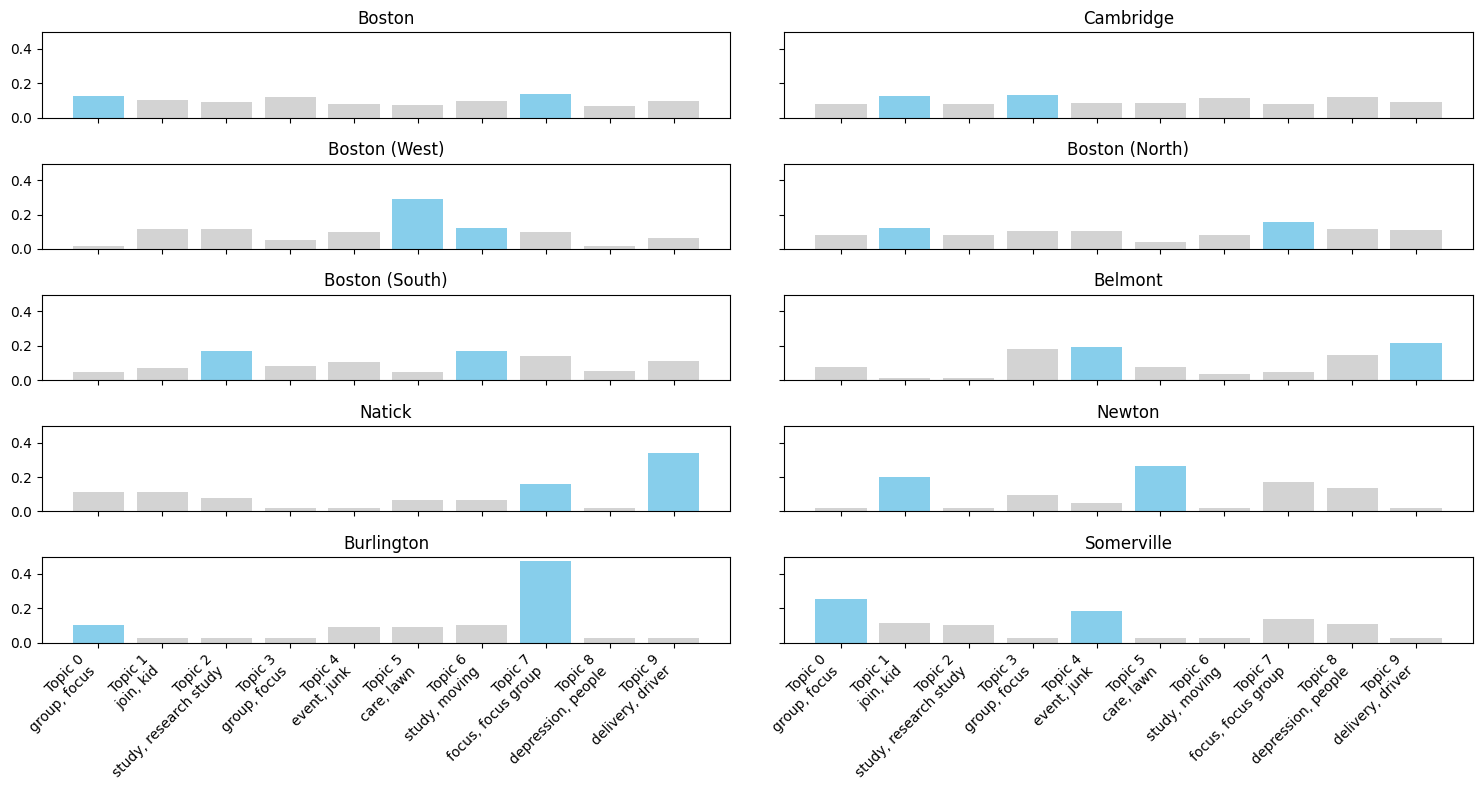

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create list of neighborhood names
neighborhood_names = []
for neighborhood in top_10_values:
    print(neighborhood)
    neighborhood_names.append(neighborhood)

# Set up subplots
num_rows = len(neighborhood_names) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 8), sharex=True, sharey=True)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Extract top words for all topics
top_words_all_topics = [
    ", ".join([terms[i] for i in lda.components_[idx].argsort()[:-2 - 1:-1]])
    for idx in range(lda.n_components)
]

for i, neighborhood in enumerate(neighborhood_names):
    # Extract topic distribution for the neighborhood
    neighborhood_mask = top_10_rows['post_hood_cleaned'] == neighborhood
    neighborhood_distributions = document_topics[neighborhood_mask]
    average_distribution = np.mean(neighborhood_distributions, axis=0)

    # Find the indices of the top 2 topics
    top_2_topics_indices = np.argsort(average_distribution)[-2:]

    # Plotting the bar graph with color based on the top two topics
    ax = axes[i]
    ax.bar(range(len(average_distribution)), average_distribution, color=['skyblue' if idx in top_2_topics_indices else 'lightgray' for idx in range(lda.n_components)])
    ax.set_title(neighborhood)

    # Display the top words for all topics on the x-axis
    ax.set_xticks(range(lda.n_components))
    ax.set_xticklabels([f'Topic {i}\n{top_words_all_topics[i]}' for i in range(lda.n_components)], rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
"""import folium
import numpy as np
import requests

# Function to get coordinates for a location using requests
def get_coordinates(location):
    base_url = "https://nominatim.openstreetmap.org/search"
    params = {
        "q": location,
        "format": "json",
    }
    response = requests.get(base_url, params=params)
    data = response.json()
    if data:
        # Extract latitude and longitude from the first result
        lat, lon = float(data[0]["lat"]), float(data[0]["lon"])
        return lat, lon
    else:
        return None

# Explicitly declared coordinates for certain neighborhoods
explicit_coordinates = {
    "Boston (West)": (42.2782, -71.1600),  # Updated coordinates for Boston West
    "Cambridge": (42.3736, -71.1097),
    "Belmont": (42.3956, -71.1776),
    "Newton": (42.3370, -71.2092),
    "Burlington": (42.5047, -71.1956),
    "Natick": (42.2776, -71.3468),
    "Somerville": (42.3876, -71.0968),
}

# You might need to adjust this based on your data structure
top_10_values = ["Boston", "Cambridge", "Boston (West)", "Boston (North)", "Boston (South)", "Belmont", "Natick", "Newton", "Burlington", "Somerville"]

# Create a Folium map
neighborhood_map = folium.Map(location=[42.3601, -71.0589], zoom_start=11)

# Iterate through each neighborhood
for neighborhood in top_10_values:
    # Check if the neighborhood has explicitly declared coordinates
    if neighborhood in explicit_coordinates:
        coordinates = explicit_coordinates[neighborhood]
    else:
        # Get the coordinates for the neighborhood using requests
        coordinates = get_coordinates(neighborhood)

    if coordinates:
        # Create a boolean mask for the neighborhood
        neighborhood_mask = top_10_rows['post_hood_cleaned'] == neighborhood

        # Extract topic distribution for the neighborhood using the mask
        neighborhood_distributions = document_topics[neighborhood_mask]
        average_distribution = np.mean(neighborhood_distributions, axis=0)

        # Find the indices of the top 2 topics
        top_2_topics_indices = np.argsort(average_distribution)[-2:]

        # Extract top words for each top topic
        top_words = []
        for idx in top_2_topics_indices:
            top_terms = " ".join([terms[i] for i in lda.components_[idx].argsort()[:-2 - 1:-1]])
            top_words.append(f"Topic {idx}: {top_terms}")

        # Display the top two topics as tooltips on the map
        tooltip_text = f"{neighborhood}<br>Topics: {', '.join(top_words)}"
        folium.Marker(location=coordinates, tooltip=tooltip_text).add_to(neighborhood_map)
    else:
        print(f"Warning: Coordinates not found for {neighborhood}")

# Save the map as an HTML file
neighborhood_map.save("neighborhood_map.html")
"""

In [ ]:
import folium
import requests

# Function to get coordinates for a location using requests
def get_coordinates(location):
    base_url = "https://nominatim.openstreetmap.org/search"
    params = {
        "q": location,
        "format": "json",
    }
    response = requests.get(base_url, params=params)
    data = response.json()
    if data:
        lat, lon = float(data[0]["lat"]), float(data[0]["lon"])
        return lat, lon
    else:
        return None

# Explicitly declared coordinates for certain neighborhoods
explicit_coordinates = {
    "Boston": (42.3601, -71.0589),  # Assuming default coordinates for Boston
    "Boston (West)": (42.364758, -71.067421),
    "Cambridge": (42.363611,  -71.10558),
    "Belmont": (42.3956, -71.1776),
    "Newton": (42.3370, -71.2092),
    "Burlington": (42.5047, -71.1956),
    "Natick": (42.28410, -71.3468),
    "Somerville": (42.3876, -71.0968),
    "Boston (South)": (42.3407, -71.0706),
    "Boston (North)": (42.3652, -71.0555)
    # Add more neighborhoods if needed
}

# Create a Folium map
neighborhood_map = folium.Map(location=[42.3601, -71.0589], zoom_start=11)

# Iterate through each row in the DataFrame
for _, row in selected_data.iterrows():
    neighborhood = row['post_hood_cleaned']
    description = row['Generated_Description']
    description_topic2 = row['Generated_Description_Topic2']

    # Check if the neighborhood has explicitly declared coordinates
    if neighborhood in explicit_coordinates:
        coordinates = explicit_coordinates[neighborhood]
    else:
        # Get the coordinates for the neighborhood using requests
        coordinates = get_coordinates(neighborhood)

    if coordinates:
        # Tooltip text using the descriptions
        tooltip_text = f"{neighborhood}<br>Trending Gig: {description}<br>Trending Gig: {description_topic2}"
        folium.Marker(location=coordinates, tooltip=tooltip_text).add_to(neighborhood_map)
    else:
        print(f"Warning: Coordinates not found for {neighborhood}")

# Save the map as an HTML file
neighborhood_map.save("neighborhood_map.html")


In [ ]:
# Selecting and renaming columns
columns_to_save = selected_data[['post_hood_cleaned', 'Generated_Description', 'Generated_Description_Topic2']]
columns_to_save.columns = ['Neighborhood', 'Trending Gig 1', 'Trending Gig 2']

# Save to CSV
columns_to_save.to_csv('trending_gigs.csv', index=False)

In [ ]:
display(top_10_rows)

,Unnamed: 0,post_datetime,post_title_link,post_title_text,post_hood,detail_body,Completed,pay_from_post,pay_rate,post_hood_cleaned,...,Topic_2_Distribution,Topic_3_Distribution,Topic_4_Distribution,Topic_5_Distribution,Topic_6_Distribution,Topic_7_Distribution,Topic_8_Distribution,Topic_9_Distribution,Top_2_Topics,Top_Terms_for_Top_2_Topics
0,0,2022-09-26T16:16:39.000Z,https://boston.craigslist.org/gbs/lbg/75385228...,* Deliver with DoorDash *,boston/cambridge/brookline,NaN,True,NaN,lump,Cambridge,...,0.025000,0.025002,0.025001,0.025014,0.774978,0.025001,0.025003,0.025000,"[6, 5]","[study moving model, care lawn lawn care]"
1,1,2022-09-26T16:13:53.000Z,https://boston.craigslist.org/gbs/dmg/75385300...,Up to $300 Paid Research for Toyota / Lexus Dr...,Boston,NaN,True,300.0,lump,Boston,...,0.012503,0.012500,0.012503,0.012500,0.012502,0.012500,0.012501,0.012500,"[1, 2]","[join kid teach kid, study research study rese..."
2,2,2022-09-26T16:08:33.000Z,https://boston.craigslist.org/gbs/lbg/75385227...,Grubhub Delivery Driver - No Experience Needed!,Boston,NaN,True,NaN,hourly,Boston,...,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012501,0.887498,"[9, 8]","[delivery driver group, depression people study]"
4,4,2022-09-26T15:44:01.000Z,https://boston.craigslist.org/gbs/lbg/75385138...,💸📈💸📈LAWN CARE PROS - MAKE UP TO $1000 PER WEEK,boston/cambridge/brookline,NaN,True,1000.0,weekly,Cambridge,...,0.025000,0.025000,0.025000,0.025004,0.025000,0.025001,0.025000,0.025000,"[1, 5]","[join kid teach kid, care lawn lawn care]"
5,5,2022-09-26T15:35:40.000Z,https://boston.craigslist.org/bmw/lbg/75385095...,CARGO VAN OR BOX TRUCK WITH MOVER NEEDED,metro west,NaN,True,1800.0,lump,Boston (West),...,0.909999,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,"[2, 0]","[study research study research, group focus fo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,931,2022-08-27T17:11:07.000Z,https://boston.craigslist.org/sob/lbg/75266793...,Hingham - Labor Needed 2 Hours - Saturday 8/27...,south shore,NaN,True,25.0,hourly,Boston (South),...,0.012501,0.012503,0.012500,0.012505,0.012501,0.012500,0.887489,0.012501,"[8, 5]","[depression people study, care lawn lawn care]"
932,932,2022-08-27T15:34:58.000Z,https://boston.craigslist.org/sob/lbg/75266304...,Paid Study For Volunteers 65 Y.O. And Older,Boston,NaN,True,NaN,lump,Boston,...,0.849998,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,"[2, 4]","[study research study research, event junk rem..."
933,933,2022-08-27T14:33:42.000Z,https://boston.craigslist.org/gbs/evg/75266015...,Street Team Promo for Hip Hop Concert,"Boston,",NaN,True,20.0,hourly,Boston,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,"[0, 4]","[group focus focus group, event junk removal]"
936,936,2022-08-27T11:48:22.000Z,https://boston.craigslist.org/gbs/lbg/75265505...,Labor and a Truck - 2-3 Hours @ 9 A.M - Saturd...,boston/cambridge/brookline,NaN,True,100.0,lump,Cambridge,...,0.016669,0.016668,0.016667,0.849993,0.016668,0.016667,0.016667,0.016667,"[5, 2]","[care lawn lawn care, study research study res..."


In [ ]:
top_10_rows.to_csv('results.csv')